In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter
import importlib

import data_generation as dtgn

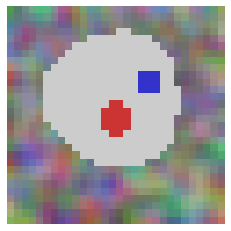

In [2]:
importlib.reload(dtgn)

N = 30 # width and length dimension of the RGB image
N_half = np.int((N - 1) / 2)
ratios = [0.7, 0.15, 0.15] # sizes of the objects
colors = [[0.8, 0.8, 0.8], [0.8, 0.2, 0.2], [0.2, 0.2, 0.8]] # colors of the objects, in RGB
bound_val = 0.5 # position bound of the smaller objects
background = 'smoothed' # background of the images, either 'zeros' or 'smoothed'.

nx, ny = (N, N)
x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
x_coord, y_coord = np.meshgrid(x, y)
distance_matrix = np.sqrt((x_coord - N_half) ** 2 + (y_coord - N_half) ** 2) + 1e-32
angle_matrix = np.arccos((x_coord - N_half) / distance_matrix)
angle_matrix[N_half, N_half] = 0
angle_matrix[N_half+1:, :] = 2 * np.pi - angle_matrix[N_half+1:, :]

img, masks = dtgn.get_an_image(N, ratios, distance_matrix, angle_matrix, bound_val, colors, background, H=1)

plt.imshow(img)
plt.axis('off')

plt.show()

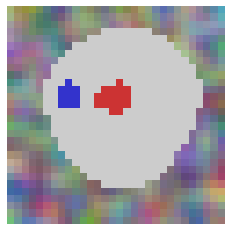

In [8]:
data_folder_s = '../results/data_smoothed/'

img = np.load(data_folder_s + f'img_{0}.npy')

plt.imshow(img)
plt.axis('off')

plt.show()

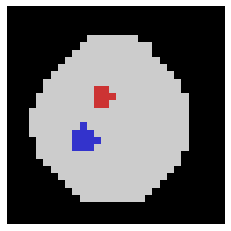

In [9]:
data_folder_s = '../results/data_zeros/'

img = np.load(data_folder_s + f'img_{0}.npy')

plt.imshow(img)
plt.axis('off')

plt.show()